In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer 
sns.set()

In [90]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['DESCR', 'target', 'data', 'filename', 'feature_names', 'target_names'])

In [123]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['cancer_y_n'] = cancer.target 
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer_y_n
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [118]:
df.corr()['cancer_y_n'].sort_values(ascending = False)

cancer_y_n                 1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

In [124]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(df.iloc[:,:-1])
print(x_std.shape)
x_std[1]

(569, 30)


array([ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,  1.90870825e+00,
       -8.26962447e-01, -4.87071673e-01, -2.38458552e-02,  5.48144156e-01,
        1.39236330e-03, -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
        2.63326966e-01,  7.42401948e-01, -6.05350847e-01, -6.92926270e-01,
       -4.40780058e-01,  2.60162067e-01, -8.05450380e-01, -9.94437403e-02,
        1.80592744e+00, -3.69203222e-01,  1.53512599e+00,  1.89048899e+00,
       -3.75611957e-01, -4.30444219e-01, -1.46748968e-01,  1.08708430e+00,
       -2.43889668e-01,  2.81189987e-01])

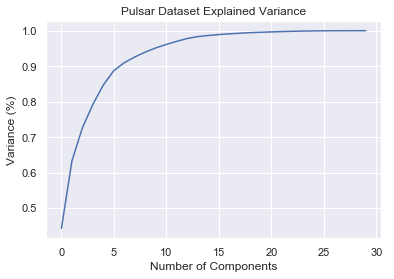

In [125]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(x_std)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [127]:
## These are the variance which covered by the principal component 
np.cumsum(pca.explained_variance_ratio_)

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [152]:
pca = PCA(n_components = 13) # 0.978 variance is covered in it
dataset = pca.fit_transform(x_std)
print(dataset.shape)
dataset[0]

(569, 13)


array([ 9.19283683,  1.94858307, -1.12316617,  3.6337309 , -1.19511011,
        1.41142448,  2.1593693 , -0.39840716, -0.15711699, -0.87740303,
        0.26294233, -0.85902697,  0.10337549])

In [153]:
df_pca = pd.DataFrame(dataset, columns = list('abcdefghijklm')) 
df_pca['cancer_y_n'] = df.cancer_y_n
df_pca.head(1)

,a,b,c,d,e,f,g,h,i,j,k,l,m,cancer_y_n
0,9.192837,1.948583,-1.123166,3.633731,-1.19511,1.411424,2.159369,-0.398407,-0.157117,-0.877403,0.262942,-0.859027,0.103375,0
